In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from repos_tools import read_chembl_screen_results, add_b3db_permeabilities
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preliminary SQLite operations

See the `notebook/2022-05-09-AD-drugs/target_{go.sql,protein_family}.sql` scripts, which produce `results/2022-05-09-AD-drugs/target-{go,pfam}.csv`, respectively.

## Importing and exploring data
### GO terms

In [2]:
fpath = '../../resources/UniProt/idmapping/HUMAN_9606_idmapping_selected.tab'
uniprot_map = pd.read_csv(fpath, sep='\t', usecols=[0, 1, 2], dtype='str', names=['uniprot_ac', 'uniprot_name', 'entrez_id'], index_col=0)
uniprot_map.head()

,uniprot_name,entrez_id
uniprot_ac,,
P31946,1433B_HUMAN,7529
P62258,1433E_HUMAN,7531
Q04917,1433F_HUMAN,7533
P61981,1433G_HUMAN,7532
P31947,1433S_HUMAN,2810


In [3]:
def reader(fpath, unimap=uniprot_map):
    df = pd.read_csv(fpath, index_col='uniprot_ac')
    df = pd.merge(unimap, df, on='uniprot_ac')
    df['uniprot_name'] = df.uniprot_name.str.replace('_HUMAN', '')
    return(df)

tgo = reader('../../results/2022-05-09-AD-drugs/target-go.csv')
tgo.tail()

,uniprot_name,entrez_id,description,cs_organism,go_id,parent_go_id,pref_name,class_level,aspect,path
uniprot_ac,,,,,,,,,,
Q30155,Q30155,NaN,HLA-DRB2 protein,Homo sapiens,GO:0005768,GO:0043226,endosome,2,C,cellular_component organelle endosome
Q30155,Q30155,NaN,HLA-DRB2 protein,Homo sapiens,GO:0016020,GO:0005575,membrane,1,C,cellular_component membrane
Q30155,Q30155,NaN,HLA-DRB2 protein,Homo sapiens,GO:0016021,GO:0005575,integral component of membrane,1,C,cellular_component integral component of memb...
Q16198,Q16198,NaN,EWS-Fli1 protein,Homo sapiens,GO:0003677,GO:0003676,DNA binding,2,F,molecular_function nucleic acid binding DNA ...
Q16198,Q16198,NaN,EWS-Fli1 protein,Homo sapiens,GO:0005634,GO:0043226,nucleus,2,C,cellular_component organelle nucleus


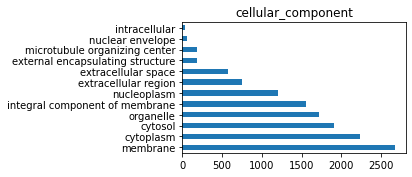

In [4]:
def go_barh(level, aspect='C', tgo=tgo):
    aspectd = {'C': 'cellular_component', 'F': 'molecular_function', 'P': 'biological_process'}
    b = (tgo.class_level == level) & (tgo.aspect == aspect)
    s = tgo.loc[b, 'pref_name'].value_counts()
    figsize = (4, len(s) / 5)
    fig, ax = plt.subplots(figsize=figsize)
    s.plot(kind='barh', ax=ax)
    ax.set_title(aspectd[aspect])
    return((fig, ax))

fig, ax = go_barh(level=1, aspect='C')

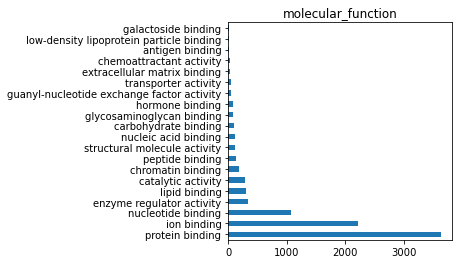

In [5]:
fig, ax = go_barh(level=1, aspect='F')

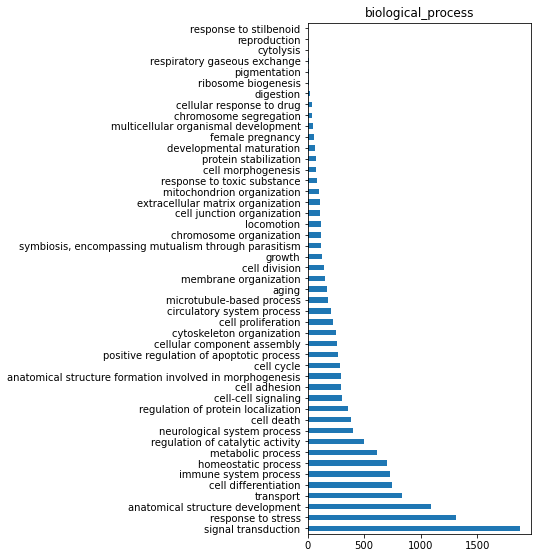

In [6]:
fig, ax = go_barh(level=1, aspect='P')

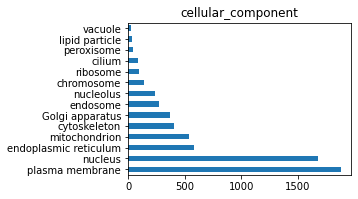

In [7]:
fig, ax = go_barh(level=2, aspect='C')

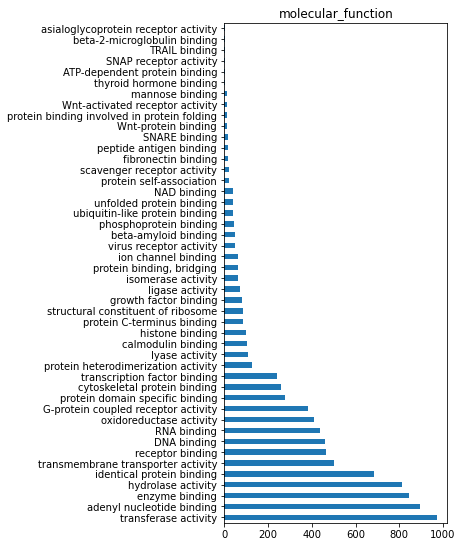

In [8]:
fig, ax = go_barh(level=2, aspect='F')

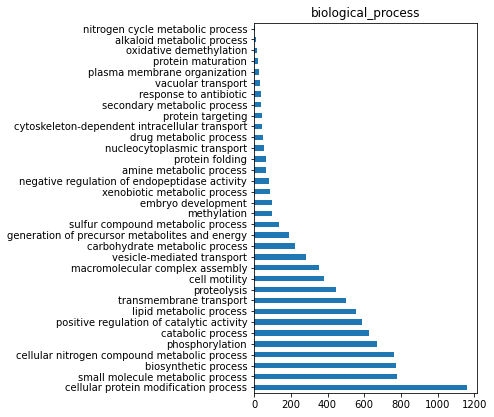

In [9]:
fig, ax = go_barh(level=2, aspect='P')

### Protein families

In [10]:
tpfam = reader('../../results/2022-05-09-AD-drugs/target-pfam.csv')
tpfam.tail()

,uniprot_name,entrez_id,description,cs_organism,protein_class_desc,pfam_level_1,pfam_level_2,pfam_level_3,pfam_level_4,pfam_level_5
uniprot_ac,,,,,,,,,,
Q2L8D9,Q2L8D9,NaN,Amyloid beta-binding alcohol dehydrogenase,Homo sapiens,unclassified,Unclassified protein,NaN,NaN,NaN,NaN
A1Z199,A1Z199,NaN,BCR/ABL p210 fusion protein,Homo sapiens,enzyme kinase protein kinase,Enzyme,Kinase,Protein Kinase,NaN,NaN
Q30155,Q30155,NaN,HLA-DRB2 protein,Homo sapiens,unclassified,Unclassified protein,NaN,NaN,NaN,NaN
Q16198,Q16198,NaN,EWS-Fli1 protein,Homo sapiens,unclassified,Unclassified protein,NaN,NaN,NaN,NaN
Q3B792,Q3B792,NaN,NQO1 protein,Homo sapiens,enzyme reductase,Enzyme,Oxidoreductase,NaN,NaN,NaN


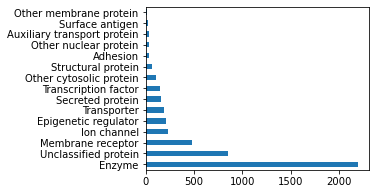

In [11]:
def pfam_barh(level, tpfam=tpfam):
    s = tpfam['pfam_level_' + str(level)].value_counts()
    figsize = (4, len(s) / 5)
    fig, ax = plt.subplots(figsize=figsize)
    tpfam['pfam_level_' + str(level)].value_counts().plot(kind='barh', ax=ax)
    return((fig, ax))

fig, ax = pfam_barh(level=1)

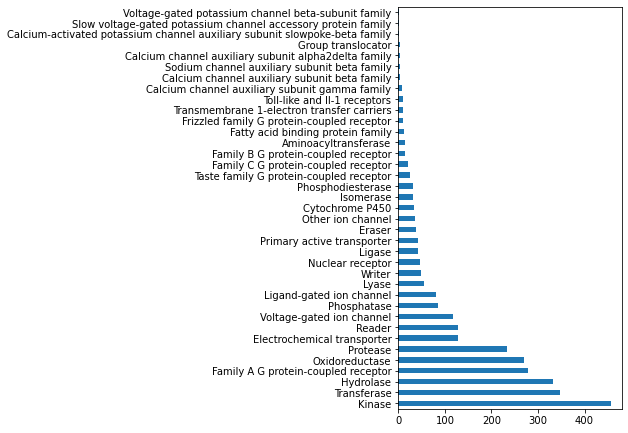

In [12]:
fig, ax = pfam_barh(level=2)

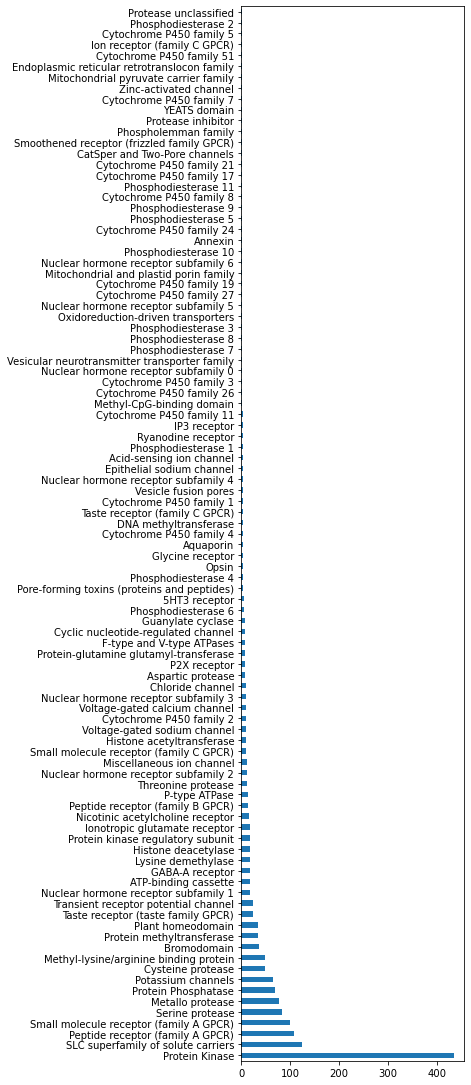

In [13]:
fig, ax = pfam_barh(level=3)

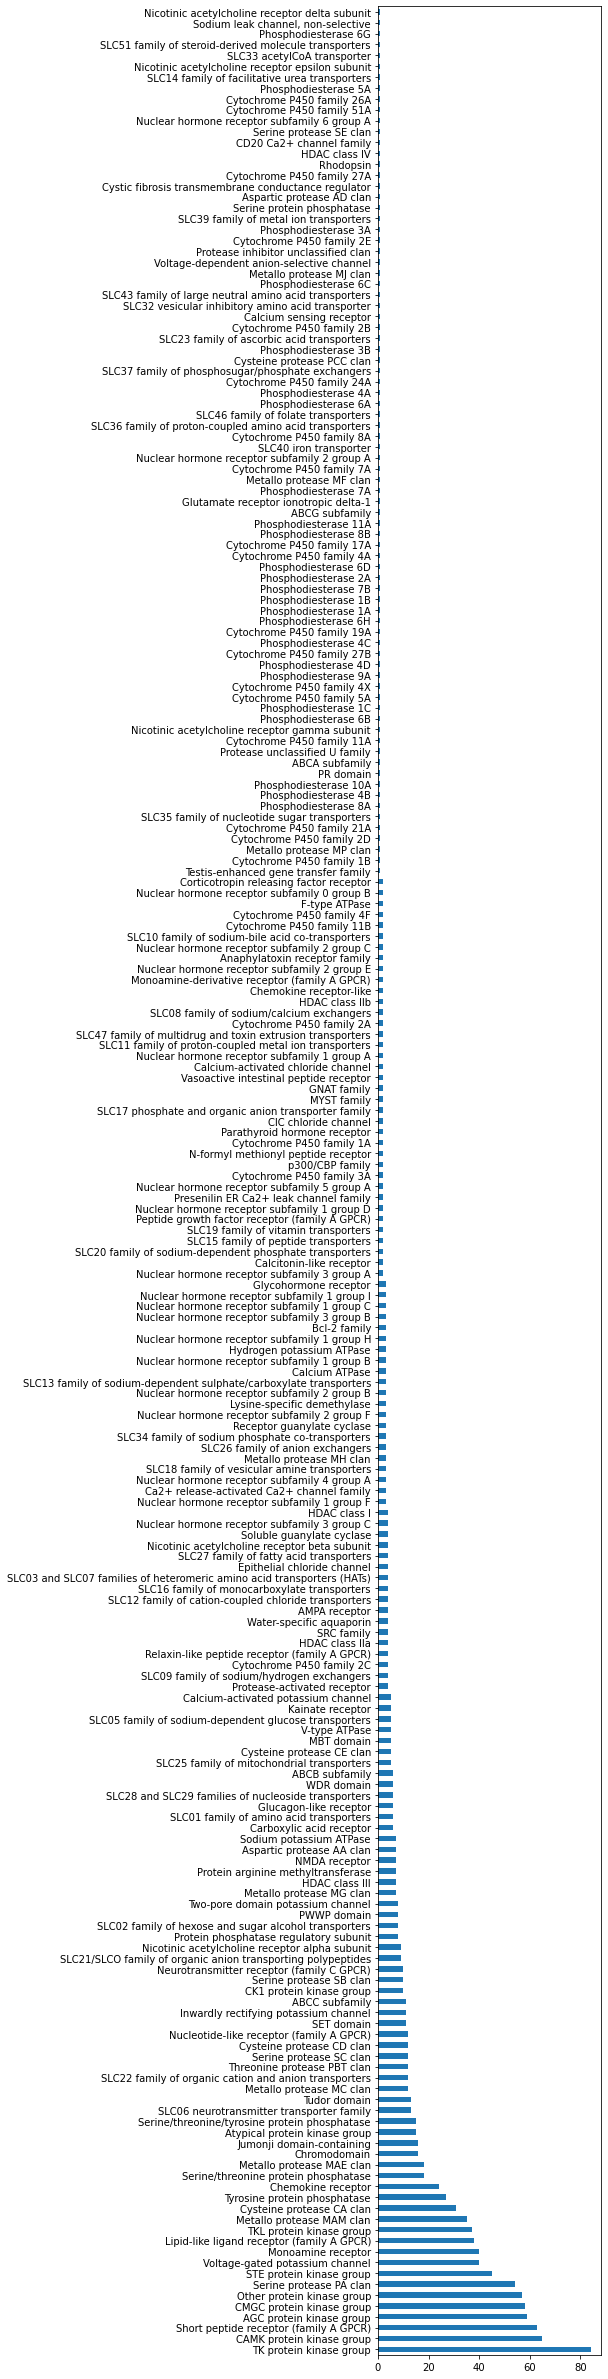

In [14]:
fig, ax = pfam_barh(level=4)

In [15]:
%connect_info

{
  "shell_port": 57238,
  "iopub_port": 57239,
  "stdin_port": 57240,
  "control_port": 57242,
  "hb_port": 57241,
  "ip": "127.0.0.1",
  "key": "653c3d88-e68b0d49eaedd90bdf6a7269",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-75beb20a-5e38-49a9-bc29-66048f5916d1.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
